In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


In [2]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


In [3]:
bike_sharing = pd.read_csv('day.csv')


In [4]:
# Question 7
bike_sharing.drop("dteday", axis=1, inplace=True)

In [5]:
# Question 8
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

bike_sharing_scaler = StandardScaler().fit(bike_sharing)
bike_sharing_standardized = shuffle(pd.DataFrame(bike_sharing_scaler.transform(bike_sharing), columns=bike_sharing.columns))
bike_sharing_standardized.reset_index(inplace=True, drop=True)


In [6]:
# Question 9
from sklearn.feature_selection import f_regression, mutual_info_regression
bike_sharing_x, bike_sharing_y = bike_sharing_standardized.iloc[:, :-3], bike_sharing_standardized.iloc[:, -1]
bike_sharing_mi, bike_sharing_f_test = mutual_info_regression(bike_sharing_x, bike_sharing_y), f_regression(bike_sharing_x, bike_sharing_y)[0]


In [8]:
import numpy as np
bike_sharing_mi /= np.max(bike_sharing_mi)
bike_sharing_f_test /= np.max(bike_sharing_f_test)
list(zip(bike_sharing_x.columns, bike_sharing_mi, bike_sharing_f_test))

[('instant', 1.0, 0.9883023729164778),
 ('season', 0.23785360004147915, 0.29840681168971794),
 ('yr', 0.3058058586521134, 0.7148668340376669),
 ('mnth', 0.41929988209660096, 0.1285191637739684),
 ('holiday', 0.012156729095315918, 0.007091741052579077),
 ('weekday', 0.04930297482687465, 0.006904470107277403),
 ('workingday', 0.026777245233163664, 0.005672541883169614),
 ('weathersit', 0.07411576786068592, 0.1466031006162136),
 ('temp', 0.43012225799226816, 0.9813814493974281),
 ('atemp', 0.5133672836121442, 1.0),
 ('hum', 0.05106134992707402, 0.0154666251984849),
 ('windspeed', 0.06180601060435831, 0.08796240528337734)]

In [9]:
from sklearn.feature_selection import SelectKBest 

def select_features(X_train, y_train, score_func, k=8):
  fs = SelectKBest(score_func=score_func, k=k)
  fs.fit(X_train, y_train)
  X_train_fs = pd.DataFrame(fs.transform(X_train), columns=pd.Index(fs.transform(X_train.columns.to_numpy().reshape(1, -1))[0]))
  return X_train_fs, fs

bike_sharing_x_fs_mi, bike_sharing_fs_mi = select_features(bike_sharing_x, bike_sharing_y, mutual_info_regression)
bike_sharing_x_fs, bike_sharing_fs = select_features(bike_sharing_x, bike_sharing_y, f_regression)


In [10]:
bike_sharing_x

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,0.947772,0.453512,0.998633,0.139196,-0.171981,0.500513,0.679706,-0.726048,1.501239,1.475520,-0.193050,-0.323549
1,0.701351,-0.447350,0.998633,-0.440589,5.814596,-0.996930,-1.471225,-0.726048,1.186904,1.258498,0.339741,0.077924
2,-1.009377,-0.447350,-1.001369,-0.150697,-0.171981,0.500513,0.679706,-0.726048,1.200570,1.041378,-2.268604,1.314494
3,-0.582879,0.453512,-1.001369,0.429089,-0.171981,0.001366,0.679706,-0.726048,0.881681,0.839836,-0.210614,-1.383603
4,-1.596995,-1.348213,-1.001369,-1.600161,-0.171981,1.498809,-1.471225,-0.726048,-1.633793,-1.610246,0.167531,-0.582624
...,...,...,...,...,...,...,...,...,...,...,...,...
726,-1.108893,-0.447350,-1.001369,-0.440589,-0.171981,0.500513,0.679706,-0.726048,0.216564,0.300946,0.840333,-0.010578
727,0.279593,-1.348213,0.998633,-1.310268,-0.171981,0.001366,0.679706,1.110427,-0.825673,-0.773007,1.242794,-0.146804
728,-0.213249,1.354375,-1.001369,1.298767,-0.171981,0.500513,0.679706,1.110427,-0.840329,-0.928052,-0.365773,1.483324
729,0.246421,-1.348213,0.998633,-1.310268,-0.171981,0.001366,0.679706,-0.726048,-0.544220,-0.501610,-0.421390,0.567950


In [11]:
# Question 21-23 (Random Forest)
# dataset: bike_sharing
import itertools
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

all_data = [bike_sharing_x_fs] #CHANGE HERE FOR YOUR DATASET!
all_label = [bike_sharing_y] #CHANGE HERE FOR YOUR DATASET!
result = {}
model_max_depth_4 = []
param_grid = {'max_depth': [4, 8, 15, 25, 30],
              'n_estimators': [30, 50, 70, 90, 110],
              'max_features': [0.1, 0.3, 0.5, 0.7, 0.9]}
all_param_combo = list(itertools.product(param_grid['max_depth'], param_grid['n_estimators'], param_grid['max_features']))
print(all_param_combo)
for data, label in zip(all_data, all_label):
    # when using the out of bags trick, it is not neccesary to split the dataset.

    for param in tqdm(all_param_combo):
        rf = RandomForestRegressor(max_depth=param[0], n_estimators=param[1], max_features=param[2], oob_score=True)
        rf.fit(data, label)
        result[param]=rf.oob_score_

        # save the model for Question 23
        if param[0]==4:
            model_max_depth_4.append(rf)


  2%|▏         | 3/125 [00:00<00:06, 20.27it/s]

[(4, 30, 0.1), (4, 30, 0.3), (4, 30, 0.5), (4, 30, 0.7), (4, 30, 0.9), (4, 50, 0.1), (4, 50, 0.3), (4, 50, 0.5), (4, 50, 0.7), (4, 50, 0.9), (4, 70, 0.1), (4, 70, 0.3), (4, 70, 0.5), (4, 70, 0.7), (4, 70, 0.9), (4, 90, 0.1), (4, 90, 0.3), (4, 90, 0.5), (4, 90, 0.7), (4, 90, 0.9), (4, 110, 0.1), (4, 110, 0.3), (4, 110, 0.5), (4, 110, 0.7), (4, 110, 0.9), (8, 30, 0.1), (8, 30, 0.3), (8, 30, 0.5), (8, 30, 0.7), (8, 30, 0.9), (8, 50, 0.1), (8, 50, 0.3), (8, 50, 0.5), (8, 50, 0.7), (8, 50, 0.9), (8, 70, 0.1), (8, 70, 0.3), (8, 70, 0.5), (8, 70, 0.7), (8, 70, 0.9), (8, 90, 0.1), (8, 90, 0.3), (8, 90, 0.5), (8, 90, 0.7), (8, 90, 0.9), (8, 110, 0.1), (8, 110, 0.3), (8, 110, 0.5), (8, 110, 0.7), (8, 110, 0.9), (15, 30, 0.1), (15, 30, 0.3), (15, 30, 0.5), (15, 30, 0.7), (15, 30, 0.9), (15, 50, 0.1), (15, 50, 0.3), (15, 50, 0.5), (15, 50, 0.7), (15, 50, 0.9), (15, 70, 0.1), (15, 70, 0.3), (15, 70, 0.5), (15, 70, 0.7), (15, 70, 0.9), (15, 90, 0.1), (15, 90, 0.3), (15, 90, 0.5), (15, 90, 0.7), (15,

100%|██████████| 125/125 [00:19<00:00,  6.38it/s]


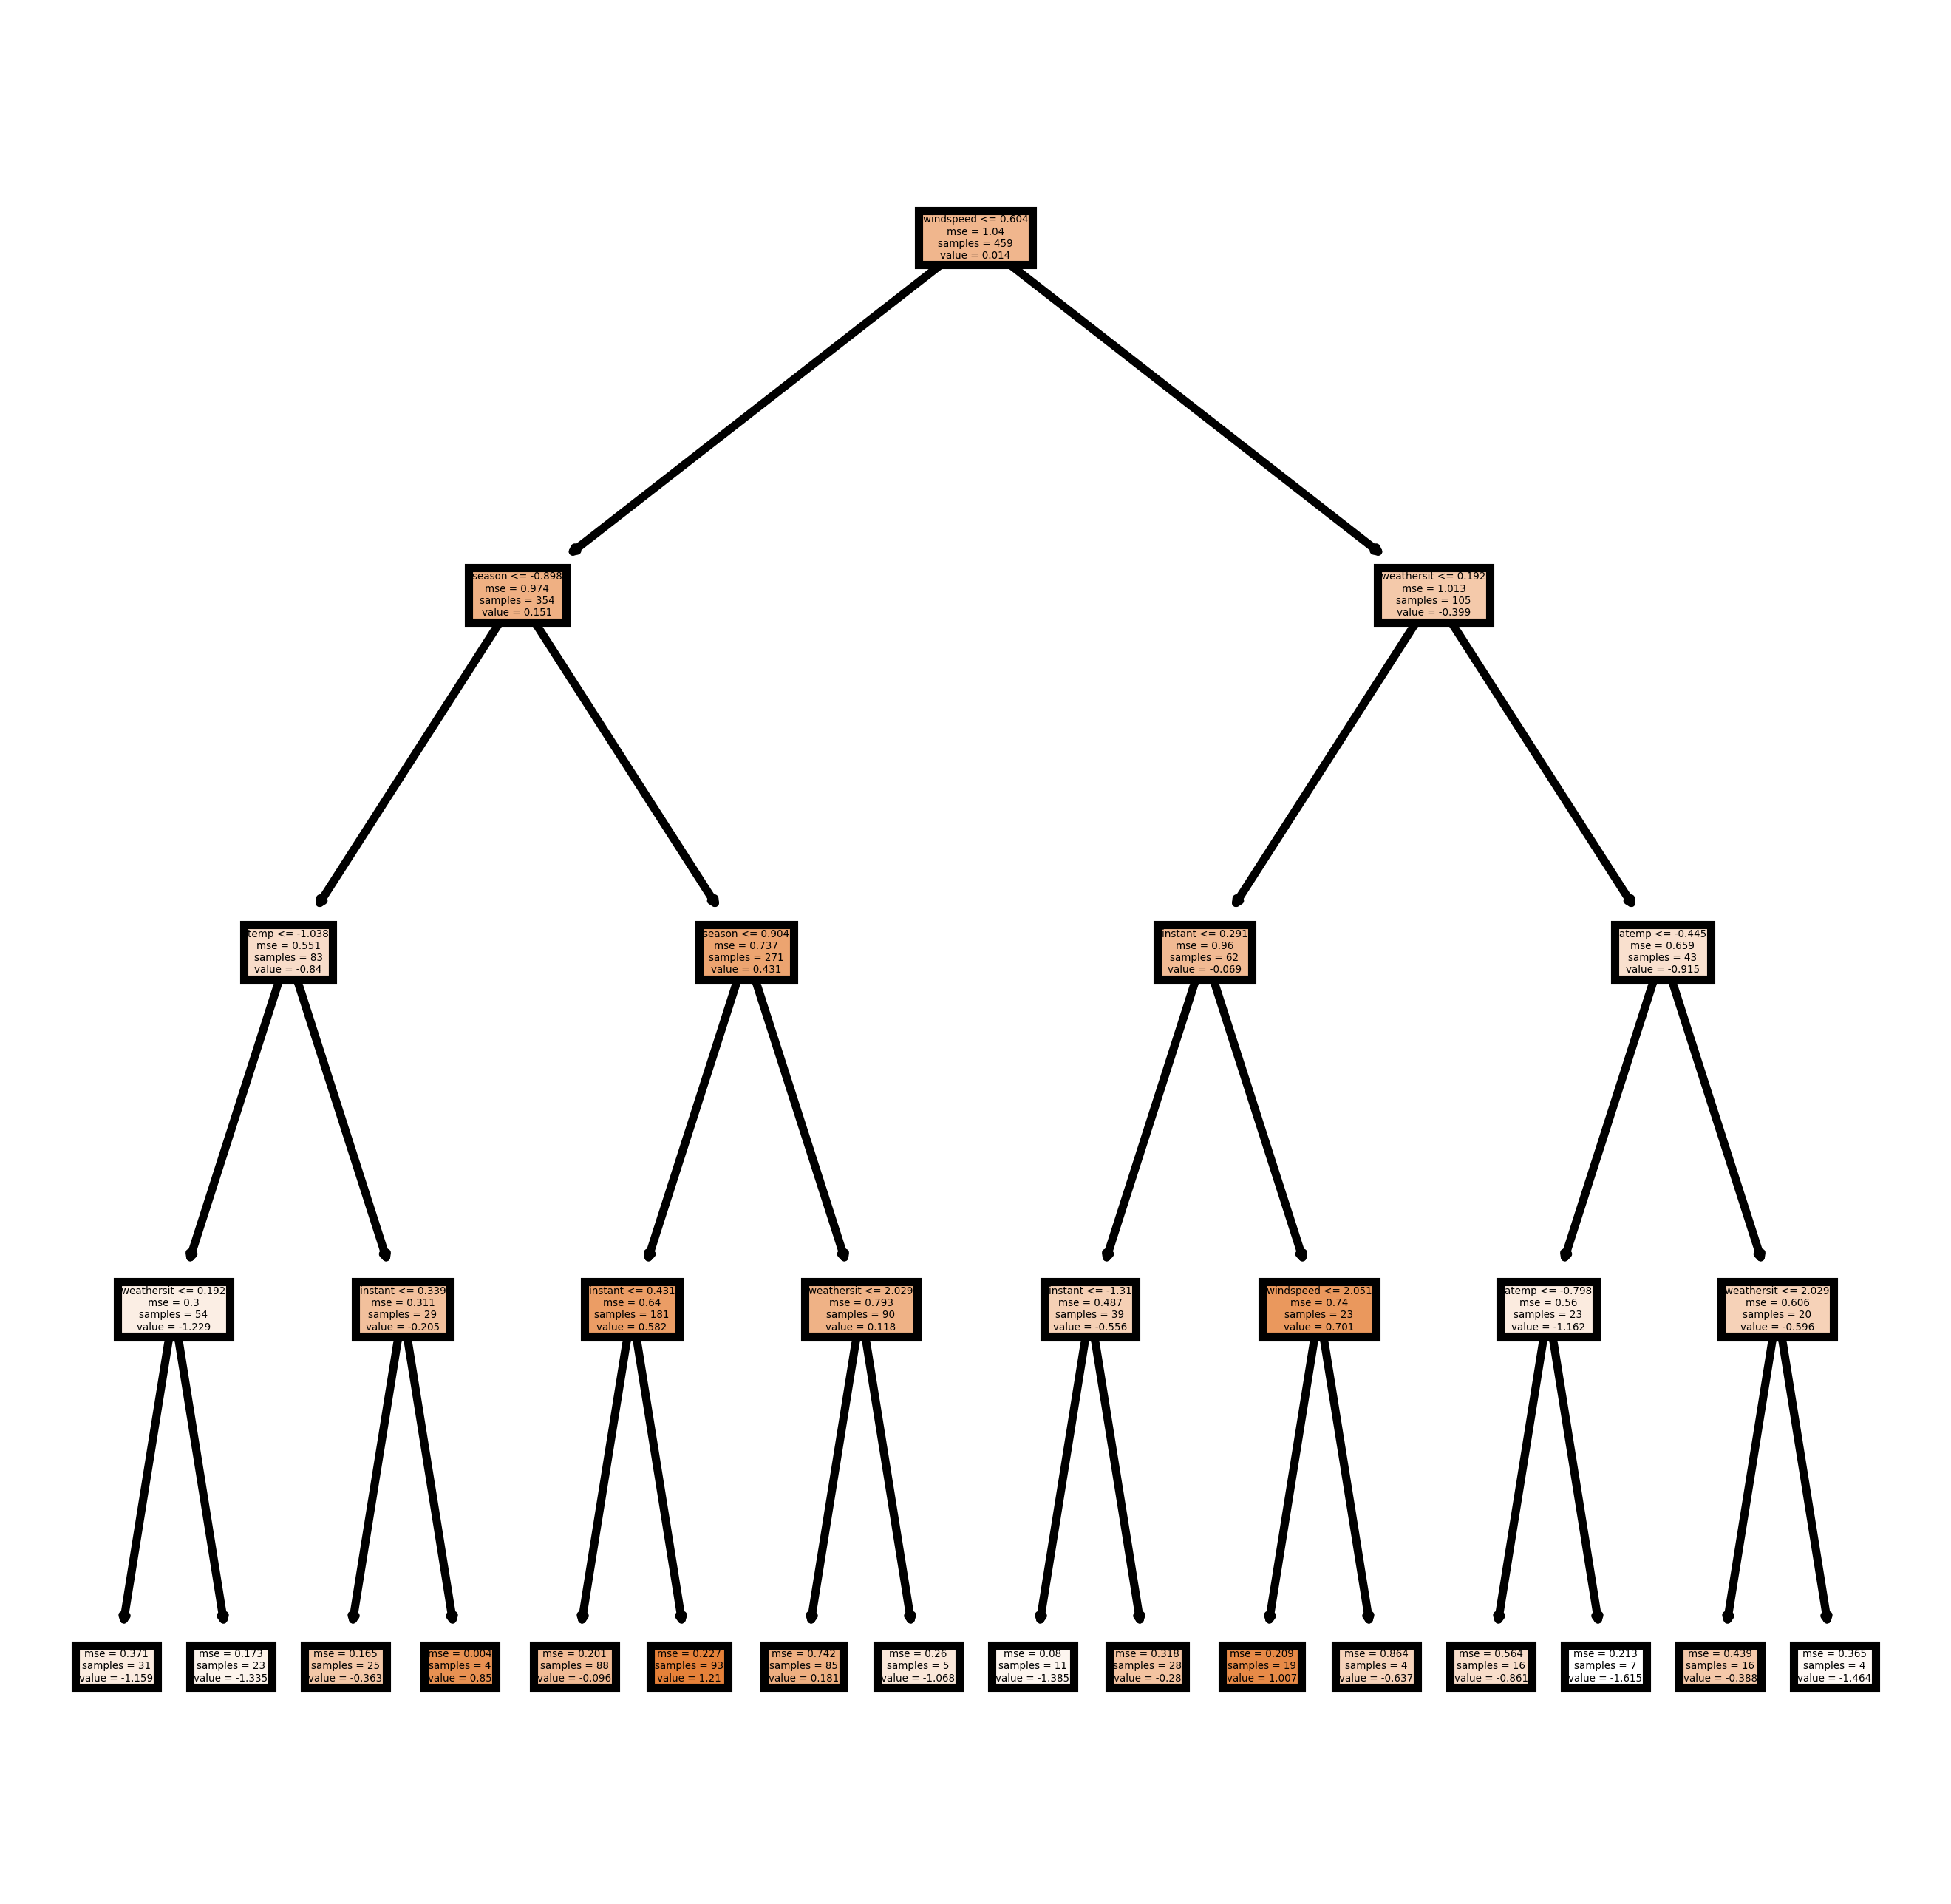

In [14]:
# random forest visualize
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model_max_depth_4[0].estimators_[0],
               feature_names = bike_sharing_x_fs.columns, 
               class_names='total count',
               filled = True);